# Exercise 10.7

**Fit a neural network to the `Default` data. Use a single hidden layer with 10 units, and dropout regularization. Have a look at Labs 10.9.1–10.9.2 for guidance. Compare the classification performance of your model with that of linear logistic regression.**

First, preprocess the data.

In [ ]:
n <- nrow(Default)
test_index <- sample(n, n/5)
x <- model.matrix(default ~ . - 1, data=Default) %>% scale()
y <- as.numeric(Default$default)-1

Next, build a neural network.

In [ ]:
modnn <- keras_model_sequential(input_shape=c(ncol(x))) %>%
    layer_dense(units=10, activation="relu") %>%
    layer_dropout(rate=0.4) %>%
    layer_dense(units=1, activation="sigmoid")

modnn %>% compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = c("accuracy")
)

Finally, fit the model to the data.

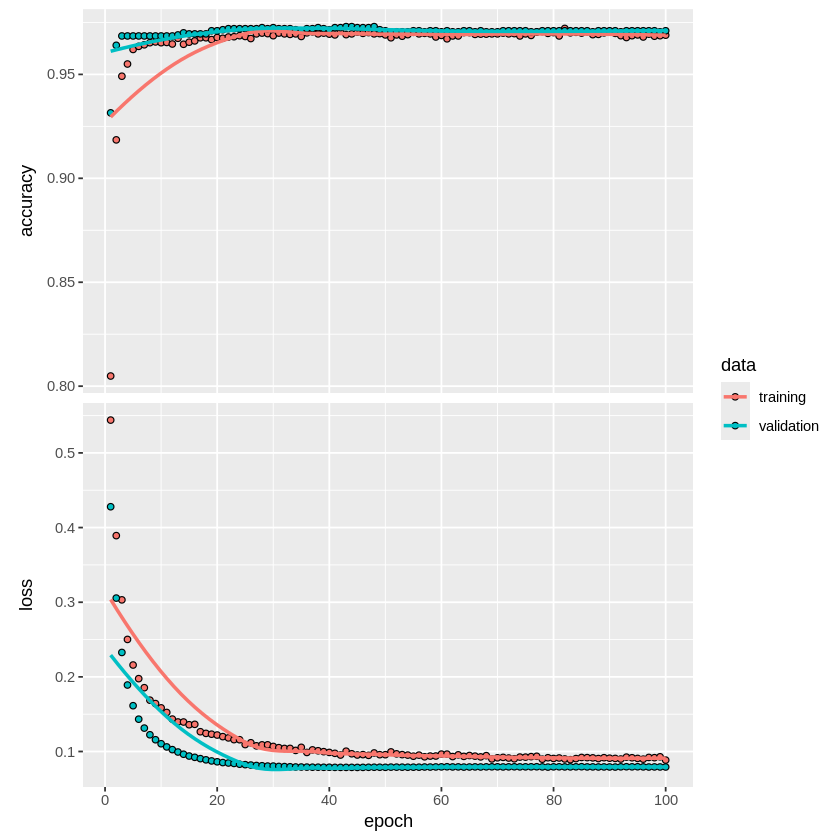

In [ ]:
history <- modnn %>% fit(
    x[-test_index,],
    y[-test_index],
    epochs = 100,
    batch_size = 128,
    validation_data = list(x[test_index,], y[test_index])
)

plot(history)

We also fit the logistic regression model to compare its classification performance with that of the neural network.

In [ ]:
test <- Default[test_index,]
glm.fit <- glm(default ~ ., data=Default[-test_index,], family="binomial")
glm.prob <- predict(glm.fit, test, type="response")
glm.pred <- rep("No", nrow(test))
glm.pred[glm.prob > .5] = "Yes"

glm.conf <- table(glm.pred, test$default)
glm.conf
(glm.conf[1] + glm.conf[4]) / sum(glm.conf)

        
glm.pred   No  Yes
     No  1928   45
     Yes    9   18

[1] 0.973

It turns out that the classification performances of the two models are comparable.